In [10]:
import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the CSV file
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\META_historical_data.csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [3]:
# Remove rows with NaN values from all columns
df_cleaned = df.dropna()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\META_historical_data_cleaned.csv', index=False)

# Load the cleaned data
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\META_historical_data_cleaned.csv')

# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days

# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                                                                                           fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()

# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])

           Close        SMA        RSI       MACD  MACD_Signal  MACD_Hist
200    50.230000   30.25245  59.884785   2.964726     2.675432   0.289294
201    50.419998   30.36335  59.951534   2.950121     2.730370   0.219751
202    50.279999   30.48070  59.877751   2.893890     2.763074   0.130816
203    49.180000   30.59285  59.301438   2.729107     2.756280  -0.027173
204    51.040001   30.70950  59.956412   2.717279     2.748480  -0.031201
...          ...        ...        ...        ...          ...        ...
2921  461.269989  428.20065  53.893405  -6.550694    -1.274374  -5.276320
2922  453.410004  428.89055  53.538414  -8.810746    -2.781648  -6.029098
2923  465.700012  429.62725  54.014417  -9.500635    -4.125446  -5.375189
2924  465.709991  430.34660  54.014802  -9.932081    -5.286773  -4.645308
2925  463.190002  431.02345  53.900434 -10.357947    -6.301008  -4.056939

[2726 rows x 6 columns]


In [5]:
# Display the first few rows of the DataFrame
print("Historical Data:")
print(df.head())

Historical Data:
         Date       Open       High        Low      Close  Adj Close  \
0  2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441   
1  2012-12-13  27.590000  28.750000  27.430000  28.240000  28.182087   
2  2012-12-14  28.180000  28.330000  26.760000  26.809999  26.755020   
3  2012-12-17  26.770000  27.000000  26.320000  26.750000  26.695143   
4  2012-12-18  26.959999  27.910000  26.900000  27.709999  27.653173   

     Volume  Dividends  Stock Splits  
0  46704200        0.0           0.0  
1  81051600        0.0           0.0  
2  91631600        0.0           0.0  
3  57742500        0.0           0.0  
4  60512900        0.0           0.0  


In [6]:
# Create a Ticker object for META
ticker = yf.Ticker("META")

In [7]:
# Get financial statements
financials = ticker.financials
print("\nFinancials:")
print(financials)


Financials:
                                                        2023-12-31  \
Tax Effect Of Unusual Items                            -64416000.0   
Tax Rate For Calcs                                           0.176   
Normalized EBITDA                                    59418000000.0   
Total Unusual Items                                   -366000000.0   
Total Unusual Items Excluding Goodwill                -366000000.0   
Net Income From Continuing Operation Net Minori...   39098000000.0   
Reconciled Depreciation                              11178000000.0   
Reconciled Cost Of Revenue                           25959000000.0   
EBITDA                                               59052000000.0   
EBIT                                                 47874000000.0   
Net Interest Income                                   1043000000.0   
Interest Expense                                       446000000.0   
Interest Income                                       1639000000.0   
Normali

In [8]:
# Get the balance sheet
balance_sheet = ticker.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)


Balance Sheet:
                                                      2023-12-31  \
Treasury Shares Number                                       0.0   
Ordinary Shares Number                              2561000000.0   
Share Issued                                        2561000000.0   
Total Debt                                         37234000000.0   
Tangible Book Value                               131726000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   65403000000.0   
Other Short Term Investments                       23541000000.0   
Cash And Cash Equivalents                          41862000000.0   
Cash Equivalents                                   35597000000.0   
Cash Financial                                      6265000000.0   

                                                      2022-12-31  \
Treasury Shares Number                                       NaN   
Ordinary Shares Number         

In [9]:
# Get the cash flow statement
cash_flow = ticker.cashflow
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                   2023-12-31     2022-12-31  \
Free Cash Flow                                  43847000000.0  19044000000.0   
Repurchase Of Capital Stock                    -19774000000.0 -27956000000.0   
Repayment Of Debt                               -1058000000.0   -850000000.0   
Issuance Of Debt                                 8455000000.0   9921000000.0   
Capital Expenditure                            -27266000000.0 -31431000000.0   
Interest Paid Supplemental Data                   448000000.0            0.0   
Income Tax Paid Supplemental Data                6607000000.0   6407000000.0   
End Cash Position                               42827000000.0  15596000000.0   
Beginning Cash Position                         15596000000.0  16865000000.0   
Effect Of Exchange Rate Changes                   113000000.0   -638000000.0   
Changes In Cash                                 27118000000.0   -631000000.0   
Financing Cash Flo

In [11]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

In [12]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

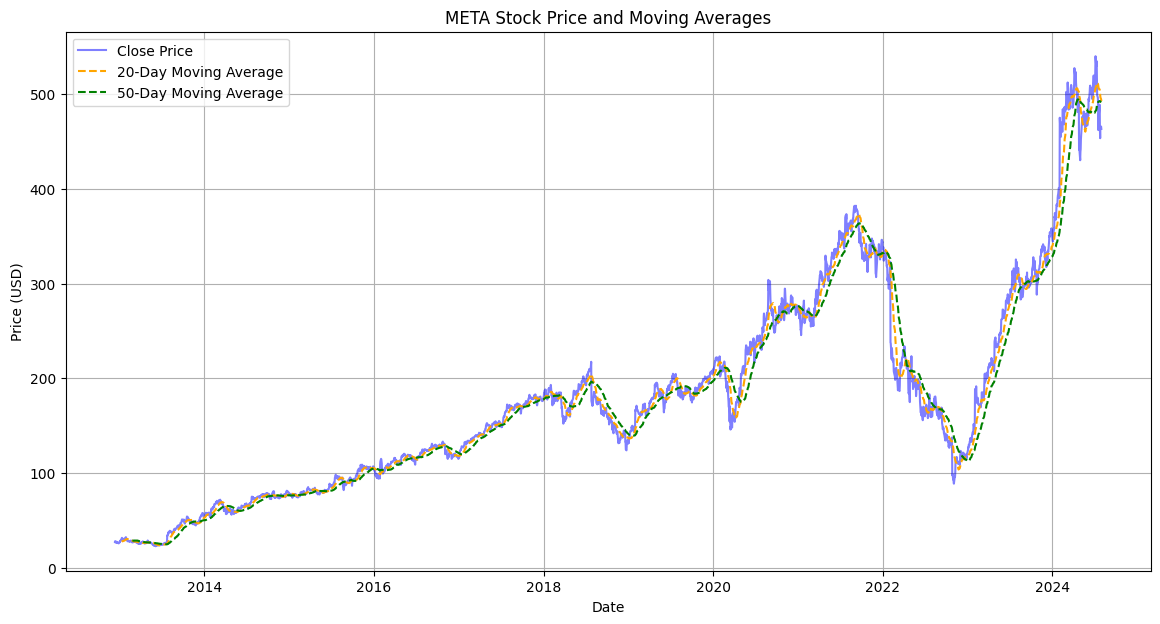

In [13]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['MA50'], label='50-Day Moving Average', color='green', linestyle='--')

plt.title('META Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()